## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Dataset

In [2]:
economy_df = pd.read_csv('EconomiesOfScale.csv')

In [3]:
economy_df.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [4]:
economy_df.tail()

,Number of Units,Manufacturing Cost
995,8.099710,23.855067
996,8.739752,27.536542
997,8.780888,25.973787
998,8.897700,25.138311
999,10.000000,21.547777


In [5]:
economy_df.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


In [6]:
economy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Number of Units       1000 non-null float64
Manufacturing Cost    1000 non-null float64
dtypes: float64(2)
memory usage: 15.8 KB


## Visualize the Data

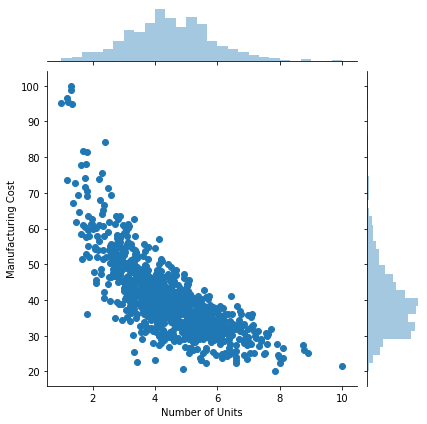

In [7]:
sns.jointplot(x= 'Number of Units', y='Manufacturing Cost', data=economy_df)

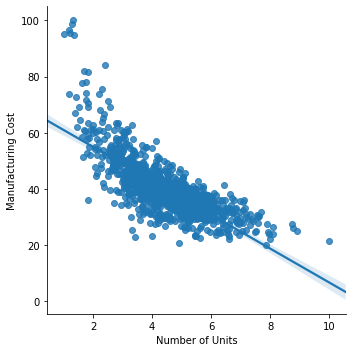

In [8]:
sns.lmplot(x= 'Number of Units', y='Manufacturing Cost', data=economy_df)

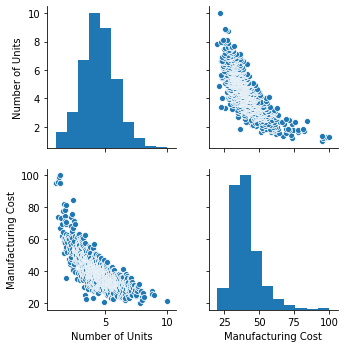

In [9]:
sns.pairplot(economy_df)

## Splitting dataset into training and testing data

In [10]:
X = economy_df[['Number of Units']]

In [11]:
y = economy_df['Manufacturing Cost']

In [12]:
X.shape

(1000, 1)

In [13]:
y.shape

(1000,)

In [17]:
X_train = X
y_train = y

## Model - 1 ( Linear Model )

## Model Training

In [14]:
from sklearn.linear_model import LinearRegression

In [23]:
regressor = LinearRegression(fit_intercept=True)

In [24]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
print('Linear Model coef (m): ', regressor.coef_)
print('Linear Model coef (b): ', regressor.intercept_)

Linear Model coef (m):  [-6.0333683]
Linear Model coef (b):  67.03904193389238


## Visualize the result

Text(0.5, 1.0, 'Number of Units vs Manufacturing Cost ( Linear )')

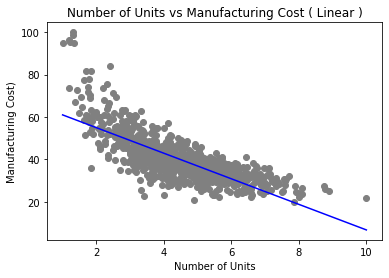

In [27]:
plt.scatter(X_train, y_train, color='gray')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.xlabel('Number of Units')
plt.ylabel('Manufacturing Cost)')
plt.title('Number of Units vs Manufacturing Cost ( Linear )')

## Model - 2 ( Polynomial )

## Model Training

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
poly_regressor = PolynomialFeatures(degree = 5)

In [40]:
X_columns = poly_regressor.fit_transform(X_train)

In [41]:
X_columns

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.18599365e+00, 1.40658094e+00, 1.66819606e+00,
        1.97846993e+00, 2.34645277e+00],
       [1.00000000e+00, 1.19149864e+00, 1.41966901e+00, 1.69153369e+00,
        2.01546010e+00, 2.40141796e+00],
       ...,
       [1.00000000e+00, 8.78088812e+00, 7.71039962e+01, 6.77041565e+02,
        5.94502623e+03, 5.22026103e+04],
       [1.00000000e+00, 8.89769971e+00, 7.91690601e+01, 7.04422522e+02,
        6.26774007e+03, 5.57684690e+04],
       [1.00000000e+00, 1.00000000e+01, 1.00000000e+02, 1.00000000e+03,
        1.00000000e+04, 1.00000000e+05]])

In [42]:
regressor = LinearRegression()
regressor.fit(X_columns, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
print('Linear Model coef (m): ', regressor.coef_)

Linear Model coef (m):  [ 0.00000000e+00 -9.24985286e+01  3.06811266e+01 -5.35771972e+00
  4.64221376e-01 -1.56845726e-02]


## Visualize the Result

In [44]:
y_predict = regressor.predict(poly_regressor.fit_transform(X_train))

Text(0.5, 1.0, 'Number of Units vs Manufacturing Cost (Poly degree=5)')

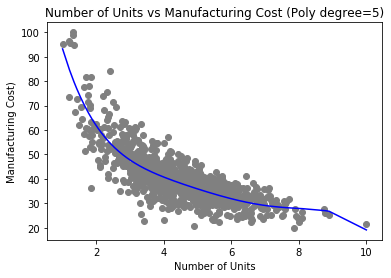

In [45]:
plt.scatter(X_train, y_train, color='gray')
plt.plot(X_train, y_predict, color='blue')
plt.xlabel('Number of Units')
plt.ylabel('Manufacturing Cost)')
plt.title('Number of Units vs Manufacturing Cost (Poly degree=5)')